In [73]:
import mysql.connector as sql
import pandas as pd
import datetime as dt
import numpy as np
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
import matplotlib.pyplot as plt
import math
import json
from pandas.io.json import json_normalize

In [74]:
db_connection = sql.connect(host='localhost', database='collection_visits', user='pandas', password='password')

visitsStats = pd.read_sql('SELECT * FROM VisitsStats', con=db_connection)
visitsStats['date'] = pd.to_datetime(visitsStats['date'])
visitsStats['count'] = visitsStats['count'].astype(int)
visitsStats['stat'] = visitsStats['stat'].astype('category')

In [75]:
visitsStats
#how many checkout per year and total
#how many checkins
#how many created
#how many collected 
#how many did nothing

,id,date,stat,count
0,3176623,2015-03-10,checkouts,293
1,3176625,2015-03-10,checkins,229
2,3176627,2015-03-10,created,152
3,3176629,2015-03-10,collected,7650
4,3176631,2015-03-10,did_nothing,50
...,...,...,...,...
12547,133773835,2020-12-22,checkins,0
12548,133773837,2020-12-22,created,0
12549,133773839,2020-12-22,collected,0
12550,133773841,2020-12-22,did_nothing,0


In [76]:
visitsStats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12552 entries, 0 to 12551
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   id      12552 non-null  int64         
 1   date    12552 non-null  datetime64[ns]
 2   stat    12552 non-null  category      
 3   count   12552 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 306.8 KB


In [77]:
 visitsStats[visitsStats['date'] < '2020-07-10']
#last day of visits was 2020-07-09

,id,date,stat,count
0,3176623,2015-03-10,checkouts,293
1,3176625,2015-03-10,checkins,229
2,3176627,2015-03-10,created,152
3,3176629,2015-03-10,collected,7650
4,3176631,2015-03-10,did_nothing,50
...,...,...,...,...
11677,132808297,2020-07-09,checkins,3
11678,132808299,2020-07-09,created,0
11679,132808301,2020-07-09,collected,0
11680,132808303,2020-07-09,did_nothing,0


([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

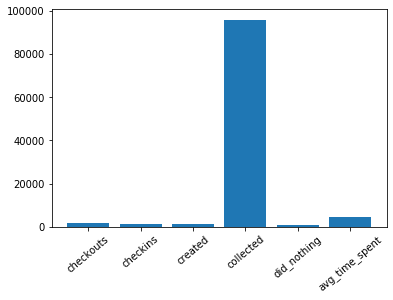

In [78]:
plt.bar(visitsStats['stat'], visitsStats['count'])
plt.xticks(rotation=40)

# checkouts

In [105]:
visitsStats_checkouts = visitsStats[visitsStats['stat']== 'checkouts']
visitsStats_checkouts['count'].sum()
#total checkouts: 547,207

547207

In [106]:
visitsStats_checkouts = visitsStats_checkouts.set_index('date')
visitsStats_checkouts['count'].nlargest()
#the most busy days

date
2017-09-23    1755
2016-09-24    1573
2016-01-02    1540
2016-03-05    1467
2016-02-20    1394
Name: count, dtype: int64

In [107]:
visitsStats_checkouts = visitsStats_checkouts.reset_index()
visitsStats_checkouts

,date,id,stat,count
0,2015-03-10,3176623,checkouts,293
1,2015-03-11,3176635,checkouts,293
2,2015-03-12,3176647,checkouts,366
3,2015-03-13,3192245,checkouts,401
4,2015-03-14,3240583,checkouts,769
...,...,...,...,...
2087,2020-12-18,133751585,checkouts,0
2088,2020-12-19,133756921,checkouts,0
2089,2020-12-20,133762005,checkouts,0
2090,2020-12-21,133767423,checkouts,0


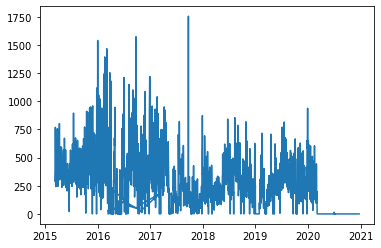

In [108]:
plt.plot(visitsStats_checkouts['date'], visitsStats_checkouts['count'])

In [113]:
checkout_by_date = visitsStats_checkouts[['date', 'count']]
checkout_per_month = checkout_by_date.date.dt.to_period("M")
checkout_month_count = checkout_by_date.groupby(checkout_per_month).sum()
checkout_month_count

,count
date,
2015-03,8617
2015-04,14520
2015-05,12994
2015-06,9820
2015-07,12118
...,...
2020-08,0
2020-09,0
2020-10,0


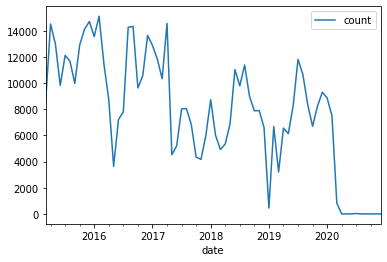

In [114]:
checkout_month_count.plot()

In [115]:
checkout_per_year = checkout_by_date.date.dt.to_period("Y")
checkout_year_count = checkout_by_date.groupby(checkout_per_year).sum()
checkout_year_count

,count
date,
2015,121450
2016,129933
2017,96763
2018,95497
2019,86358
2020,17206


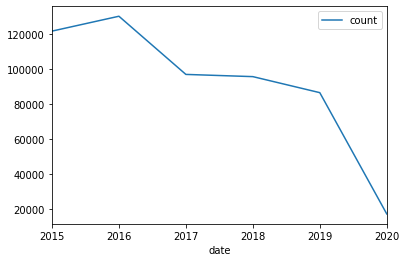

In [117]:
checkout_year_count.plot()

# checkins
##### not sure what the diff between checkins and checkout

In [99]:
visitsStats_checkins = visitsStats[visitsStats['stat']== 'checkins']
visitsStats_checkins['count'].sum()
#total checkins 470,006

470006

In [100]:
visitsStats_checkins = visitsStats_checkins.set_index('date')
visitsStats_checkins['count'].nlargest()
#the most busy days

date
2017-09-23    1514
2016-03-05    1410
2016-09-24    1385
2016-01-02    1363
2016-02-27    1271
Name: count, dtype: int64

In [101]:
visitsStats_checkins = visitsStats_checkins.reset_index()
visitsStats_checkins

,date,id,stat,count
0,2015-03-10,3176625,checkins,229
1,2015-03-11,3176637,checkins,235
2,2015-03-12,3176649,checkins,299
3,2015-03-13,3192247,checkins,129
4,2015-03-14,3240585,checkins,24
...,...,...,...,...
2087,2020-12-18,133751587,checkins,0
2088,2020-12-19,133756923,checkins,0
2089,2020-12-20,133762007,checkins,0
2090,2020-12-21,133767425,checkins,0


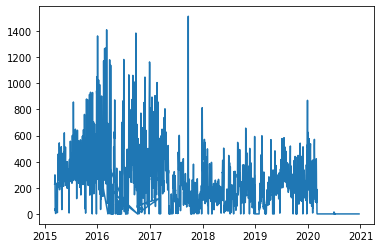

In [103]:
plt.plot(visitsStats_checkins['date'], visitsStats_checkins['count'])

In [109]:
checkins_by_date = visitsStats_checkins[['date', 'count']]
checkin_per_month = checkins_by_date.date.dt.to_period("M")
checkin_month_count = checkins_by_date.groupby(checkin_per_month).sum()
checkin_month_count

,count
date,
2015-03,2277
2015-04,9813
2015-05,11108
2015-06,8758
2015-07,11422
...,...
2020-08,0
2020-09,0
2020-10,0


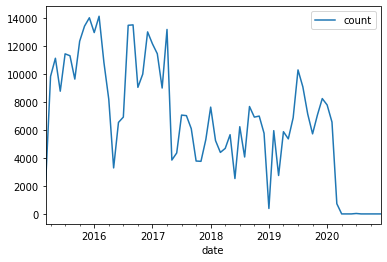

In [110]:
checkin_month_count.plot()

In [111]:
checkin_per_year = checkins_by_date.date.dt.to_period("Y")
checkin_year_count = checkins_by_date.groupby(checkin_per_year).sum()
checkin_year_count

,count
date,
2015,104008
2016,121703
2017,86890
2018,67693
2019,74623
2020,15089


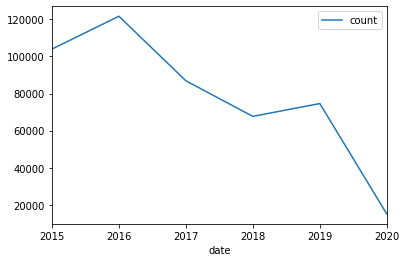

In [112]:
checkin_year_count.plot()

# collected 

In [118]:
visitsStats_collected = visitsStats[visitsStats['stat']== 'collected']
visitsStats_collected['count'].sum()
#total collected = 16,920,530
#numbers are not the same as in the visit items. 

16920530

In [119]:
visitsStats_collected = visitsStats_collected.set_index('date')
visitsStats_collected['count'].nlargest()
#the most busy days

date
2016-03-12    95929
2016-04-23    80673
2016-08-06    78798
2016-07-16    74746
2016-07-23    70634
Name: count, dtype: int64

In [120]:
visitsStats_collected = visitsStats_collected.reset_index()
visitsStats_collected

,date,id,stat,count
0,2015-03-10,3176629,collected,7650
1,2015-03-11,3176641,collected,7417
2,2015-03-12,3176653,collected,8840
3,2015-03-13,3192251,collected,9560
4,2015-03-14,3240591,collected,18198
...,...,...,...,...
2087,2020-12-18,133751591,collected,0
2088,2020-12-19,133756927,collected,0
2089,2020-12-20,133762011,collected,0
2090,2020-12-21,133767429,collected,0


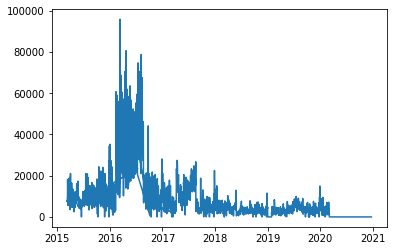

In [122]:
plt.plot(visitsStats_collected['date'], visitsStats_collected['count'])

In [123]:
collected_by_date = visitsStats_collected[['date', 'count']]
collected_per_month = collected_by_date.date.dt.to_period("M")
collected_per_month = collected_by_date.groupby(collected_per_month).sum()
collected_per_month

,count
date,
2015-03,213004
2015-04,291310
2015-05,292350
2015-06,190740
2015-07,303396
...,...
2020-08,0
2020-09,0
2020-10,0


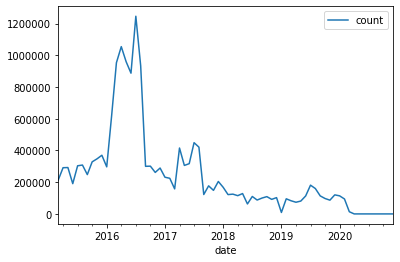

In [124]:
collected_per_month.plot()

In [125]:
collected_per_year = collected_by_date.date.dt.to_period("Y")
collected_per_year = collected_by_date.groupby(collected_per_year).sum()
collected_per_year

,count
date,
2015,2892070
2016,8097956
2017,3173867
2018,1321137
2019,1213729
2020,221771


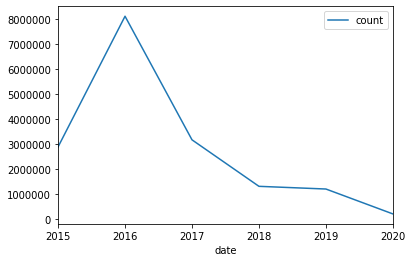

In [126]:
collected_per_year.plot()
#the numbers in collected are not fit the visit items. which i believe is better. 

# created

In [127]:
visitsStats_created = visitsStats[visitsStats['stat']== 'created']
visitsStats_created['count'].sum()
#total created = 375,233

375233

In [128]:
visitsStats_created = visitsStats_created.set_index('date')
visitsStats_created['count'].nlargest()
#the most busy days

date
2016-01-02    1172
2016-03-12    1114
2015-12-29     976
2016-03-25     937
2016-01-09     914
Name: count, dtype: int64

In [129]:
visitsStats_created = visitsStats_created.reset_index()
visitsStats_created

,date,id,stat,count
0,2015-03-10,3176627,created,152
1,2015-03-11,3176639,created,232
2,2015-03-12,3176651,created,323
3,2015-03-13,3192249,created,209
4,2015-03-14,3240587,created,646
...,...,...,...,...
2087,2020-12-18,133751589,created,0
2088,2020-12-19,133756925,created,0
2089,2020-12-20,133762009,created,0
2090,2020-12-21,133767427,created,0


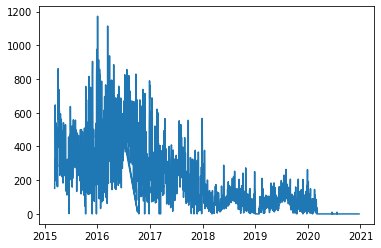

In [130]:
plt.plot(visitsStats_created['date'], visitsStats_created['count'])

In [131]:
created_by_date = visitsStats_created[['date', 'count']]
created_per_month = created_by_date.date.dt.to_period("M")
created_per_month = created_by_date.groupby(created_per_month).sum()
created_per_month

,count
date,
2015-03,6676
2015-04,14624
2015-05,10289
2015-06,8099
2015-07,10549
...,...
2020-08,0
2020-09,0
2020-10,0


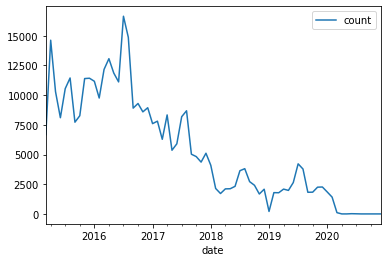

In [132]:
created_per_month.plot()

In [133]:
created_per_year = created_by_date.date.dt.to_period("Y")
created_per_year = created_by_date.groupby(created_per_year).sum()
created_per_year

,count
date,
2015,100490
2016,136378
2017,77477
2018,30834
2019,26659
2020,3395


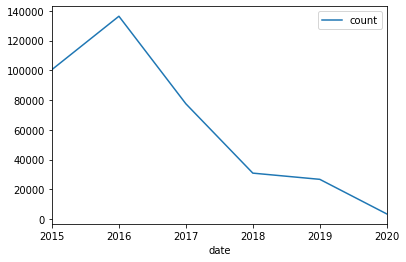

In [134]:
created_per_year.plot()

# did nothing

In [135]:
visitsStats_did_nothing = visitsStats[visitsStats['stat']== 'did_nothing']
visitsStats_did_nothing['count'].sum()
#total created = 161,052

161052

In [136]:
visitsStats_did_nothing = visitsStats_did_nothing.set_index('date')
visitsStats_did_nothing['count'].nlargest()
#what days ppl did nothing the most

date
2018-06-23    713
2018-08-11    665
2017-09-23    570
2018-08-25    488
2018-06-02    487
Name: count, dtype: int64

In [137]:
visitsStats_did_nothing = visitsStats_did_nothing.reset_index()
visitsStats_did_nothing

,date,id,stat,count
0,2015-03-10,3176631,did_nothing,50
1,2015-03-11,3176643,did_nothing,55
2,2015-03-12,3176655,did_nothing,61
3,2015-03-13,3192257,did_nothing,115
4,2015-03-14,3240595,did_nothing,174
...,...,...,...,...
2087,2020-12-18,133751593,did_nothing,0
2088,2020-12-19,133756929,did_nothing,0
2089,2020-12-20,133762013,did_nothing,0
2090,2020-12-21,133767431,did_nothing,0


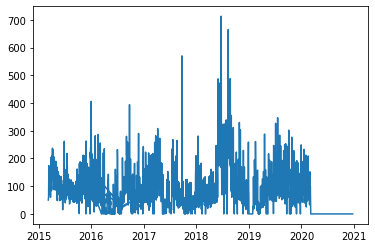

In [138]:
plt.plot(visitsStats_did_nothing['date'], visitsStats_did_nothing['count'])

In [139]:
did_nothing_by_date = visitsStats_did_nothing[['date', 'count']]
did_nothing_per_month = did_nothing_by_date.date.dt.to_period("M")
did_nothing_per_month = did_nothing_by_date.groupby(did_nothing_per_month).sum()
did_nothing_per_month

,count
date,
2015-03,2201
2015-04,4542
2015-05,3584
2015-06,2752
2015-07,2715
...,...
2020-08,0
2020-09,0
2020-10,0


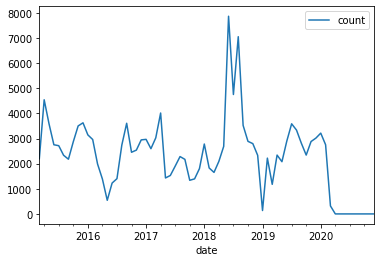

In [140]:
did_nothing_per_month.plot()

In [141]:
did_nothing_per_year = did_nothing_by_date.date.dt.to_period("Y")
did_nothing_per_year = did_nothing_by_date.groupby(did_nothing_per_year).sum()
did_nothing_per_year

,count
date,
2015,30303
2016,26938
2017,26457
2018,42248
2019,28822
2020,6284


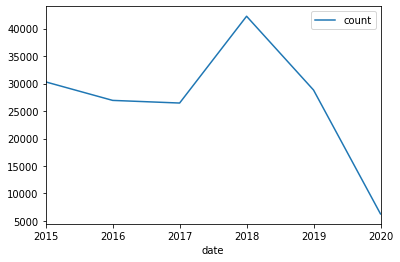

In [142]:
did_nothing_per_year.plot()

# summerize stats

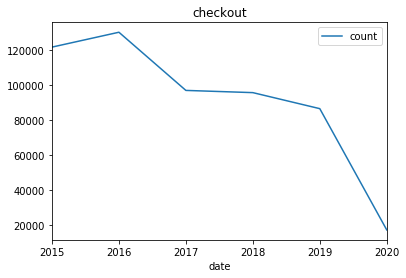

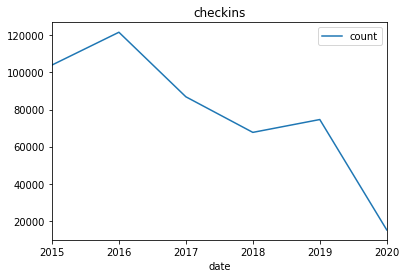

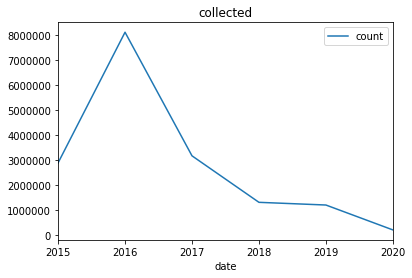

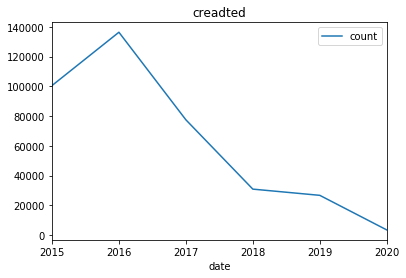

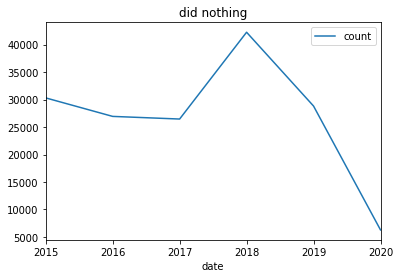

In [190]:
# fig = plt.figure()
checkout_year_count.plot(title='checkout')
checkin_year_count.plot(title='checkins')
collected_per_year.plot(title='collected')
created_per_year.plot(title='creadted')
did_nothing_per_year.plot(title='did nothing')
# for frame in [checkout_year_count, checkin_year_count, collected_per_year, created_per_year, did_nothing_per_year]:
#     frame.plot()

plt.show()

Text(0, 0.5, 'count')

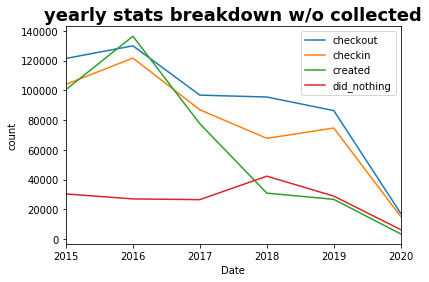

In [167]:
pd.concat([checkout_year_count,checkin_year_count, created_per_year, did_nothing_per_year],axis=1).plot()
plt.legend(['checkout', 'checkin', 'created', 'did_nothing'])
plt.title('yearly stats breakdown w/o collected', fontdict={'fontweight': 'bold', 'fontsize':18})
plt.xlabel('Date')
plt.ylabel('count')
# plt.savefig('stat_breakdowwn.png', dpi=300)

Text(0, 0.5, 'count')

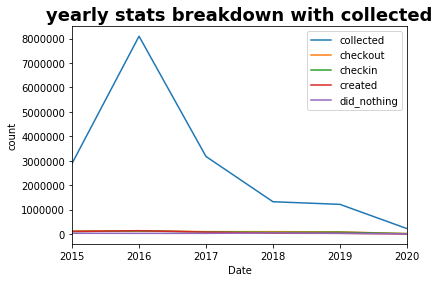

In [168]:
pd.concat([collected_per_year, checkout_year_count,checkin_year_count, created_per_year, did_nothing_per_year],axis=1).plot()
plt.legend(['collected','checkout', 'checkin', 'created', 'did_nothing'])
plt.title('yearly stats breakdown with collected', fontdict={'fontweight': 'bold', 'fontsize':18})
plt.xlabel('Date')
plt.ylabel('count')

# average time--- i don't know how it works in the backend

In [175]:
avg_time_spent_visitsStats = visitsStats[visitsStats['stat']== 'avg_time_spent']
avg_time_spent_visitsStats['count'].sum() 
#total 209,645 min/ second? --> ~3494 / 58 hours
# i will guess it is by seconds. 

209645

In [176]:
avg_time_spent_visitsStats['count'].sum() / 3600
#total sum of the avaerage times in hour

58.234722222222224

In [180]:
avg_time_spent_visitsStats = avg_time_spent_visitsStats.set_index('date')
(avg_time_spent_visitsStats['count'] / 60).nlargest()
#most time spent in min 

date
2016-07-18    72.383333
2016-10-07    48.450000
2016-07-16    23.766667
2016-09-29    10.700000
2016-11-04    10.200000
Name: count, dtype: float64

In [181]:
avg_time_spent_visitsStats = avg_time_spent_visitsStats.reset_index()
avg_time_spent_visitsStats

,date,id,stat,count
0,2015-03-10,3176633,avg_time_spent,166
1,2015-03-11,3176645,avg_time_spent,160
2,2015-03-12,3176657,avg_time_spent,138
3,2015-03-13,3192259,avg_time_spent,113
4,2015-03-14,3240597,avg_time_spent,15
...,...,...,...,...
2087,2020-12-18,133751595,avg_time_spent,0
2088,2020-12-19,133756931,avg_time_spent,0
2089,2020-12-20,133762015,avg_time_spent,0
2090,2020-12-21,133767433,avg_time_spent,0


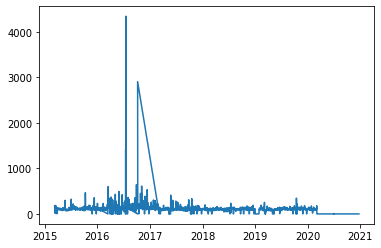

In [182]:
plt.plot(avg_time_spent_visitsStats['date'], avg_time_spent_visitsStats['count'])

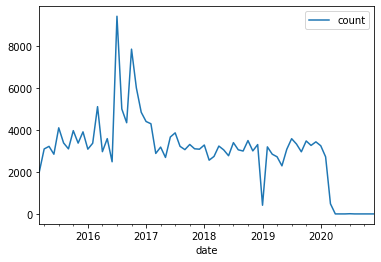

In [184]:
avg_time_spent_visitsStats = avg_time_spent_visitsStats[['date', 'count']]
avg_time_spent_month = avg_time_spent_visitsStats.date.dt.to_period("M")
avg_time_spent_month = avg_time_spent_visitsStats.groupby(avg_time_spent_month).sum()
avg_time_spent_month.plot()

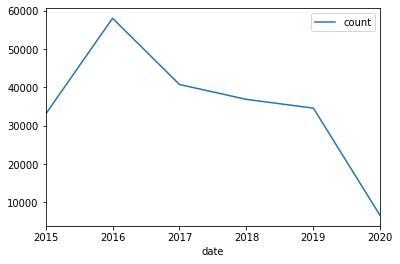

In [185]:
avg_time_spent_year = avg_time_spent_visitsStats.date.dt.to_period("Y")
avg_time_spent_year = avg_time_spent_visitsStats.groupby(avg_time_spent_year).sum()
avg_time_spent_year.plot()